# <h1 style="text-align:center;"><span style="color:darkblue">Airbnb Data Analysis</span></h1>

## <span style="color:purple">Discribtion:</span>
### This dataset contains information about Airbnb listings in a specific region. Each row represents a unique    listing, providing detailed information about the property, host, pricing, availability, and guest reviews. The dataset can be used to analyze trends in pricing, availability, and reviews, as well as to gain insights into popular neighborhoods and host activity.

## <span style="color:purple">You can Explore the Data here:</span>
### [KaggleLink](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata)


# <span style="color:blue"> 1- Exploratory Questions </span>
### 1- What is the average prices by neigboorhood group ?
### 2- what is the average number of reviews per prices ?
### 3- what is the Average prices ?
### 4- What is the number of listings per room type ?
### 5- Does the Availabilty of instant bookable affect on lisitng ?
### 6- How cancelation policy affect on listing ?
### 7- What is the Top 10 Neighborhoods with Most Listings ?


# <span style="color:blue"> 2- Data Preparation </span>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Airbnb.csv")

C:\Users\SANAD\AppData\Local\Temp\ipykernel_5256\2716113440.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Airbnb.csv")


In [3]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
## for better view we will Replace Spaces with Underscores in Column Names:
df.columns=df.columns.str.replace(" ","_")

In [5]:
df.head(5)

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.describe()

,id,host_id,lat,long,Construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [8]:
df.isnull().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last_review                        15893
reviews_per_month                  15879
country                              532
availability_365                     448
minimum_nights                       409
host_name                            406
review_rate_number                   326
calculated_host_listings_count       319
host_identity_verified               289
service_fee                          273
NAME                                 250
price                                247
Construction_year                    214
number_of_reviews                    183
country_code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood_group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host_id         

#  <span style="color:blue"> 3- Data Cleaning :</span>

In [9]:
## it seems that license column has only two rows with non missing values !! , so we should explore this column first

df.loc[~df.license.isnull()]

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


### <span style="color:red"> The same person seems to have created 2 IDs for the same listing. Which means, we need to look for duplicate rows and delete them. </span>

# Handling Duplicates

In [10]:
# first drop the repeated row 
df.drop(df.index[72947], inplace=True)

# Handle duplicate values
print("Number of duplicate values before cleaning:", df.duplicated().sum())
df.drop_duplicates(keep='first',inplace=True)
print("Number of duplicate values after cleaning:", df.duplicated().sum())

Number of duplicate values before cleaning: 541
Number of duplicate values after cleaning: 0


In [11]:
# there could be some more duplicates like the first case we saw. Let's use the latitude, longitude,
# host name, and price combination to find such cases
df.duplicated(subset=["host_name","price","lat","long"]).sum()


32752

### <span style="color:red"> 32752!! its more than quarter of the data so lets be ensure of them before taking any action </span>

In [12]:
#temp = df.loc[df.duplicated(subset=['host_name', 'lat', 'long', 'price'],keep=False)].copy()
#temp = temp.groupby(['host_name', 'lat', 'long', 'price'])
#for name, group in temp:
   # print(f"Group Name: {name}")
   # print(group)

In [13]:
#del name,group
df.drop_duplicates(subset=['host_name', 'lat', 'long', 'price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69305 entries, 0 to 102050
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   NAME                            69097 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69088 non-null  object 
 4   host_name                       68992 non-null  object 
 5   neighbourhood_group             69276 non-null  object 
 6   neighbourhood                   69289 non-null  object 
 7   lat                             69297 non-null  float64
 8   long                            69297 non-null  float64
 9   country                         68982 non-null  object 
 10  country_code                    69219 non-null  object 
 11  instant_bookable                69219 non-null  object 
 12  cancellation_policy             6924

# DataTypes manipulation

In [14]:
# <Handling price and service_fees columns>

# Step 1: Create a list of columns to clean
columns_to_clean = ['price', 'service_fee']  # Add all the columns that need to be cleaned

# Step 2: Loop through each column, remove dollar signs
for col in columns_to_clean:
    df[col] = df[col].str.replace(',', '')  # Remove commas
    df[col] = df[col].str.lstrip('$')  # Remove dollar sign
    df[col] = df[col].str.strip()  # Remove leading/trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid values become NaN

# Step 3: Check the cleaned columns
df[columns_to_clean]

,price,service_fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0
...,...,...
102046,NaN,NaN
102047,NaN,NaN
102048,NaN,NaN
102049,NaN,NaN


In [15]:
print(df[columns_to_clean].dtypes)  # Check data types of cleaned columns
print(df[columns_to_clean].isna().sum())  # Check NaN counts

price          float64
service_fee    float64
dtype: object
price          245
service_fee    241
dtype: int64


In [16]:
## Let's check the column 'last_review'

df['last_review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102046      4/9/2018
102047      1/1/2018
102048     6/10/2019
102049      3/5/2019
102050     6/12/2019
Name: last_review, Length: 69305, dtype: object

In [17]:
## <Handling last_review column>
df['last_review'] = pd.to_datetime(df['last_review'])
df["last_review"]

0        2021-10-19
1        2022-05-21
2               NaT
3        2019-07-05
4        2018-11-19
            ...    
102046   2018-04-09
102047   2018-01-01
102048   2019-06-10
102049   2019-03-05
102050   2019-06-12
Name: last_review, Length: 69305, dtype: datetime64[ns]

# Check Uniques

In [18]:
# Step 1: Identify categorical columns
check_unique_columns = ['host_identity_verified','neighbourhood_group','country',
                        'country_code','instant_bookable','cancellation_policy','room_type']

# Step 2: Check unique values for each categorical column
for col in check_unique_columns:
    unique_values = df[col].value_counts()
    print(f"column name: {unique_values}")

column name: host_identity_verified
unconfirmed    34562
verified       34526
Name: count, dtype: int64
column name: neighbourhood_group
Manhattan        29573
Brooklyn         27881
Queens            9260
Bronx             1911
Staten Island      649
brookln              1
manhatan             1
Name: count, dtype: int64
column name: country
United States    68982
Name: count, dtype: int64
column name: country_code
US    69219
Name: count, dtype: int64
column name: instant_bookable
False    34867
True     34352
Name: count, dtype: int64
column name: cancellation_policy
moderate    23187
flexible    23126
strict      22935
Name: count, dtype: int64
column name: room_type
Entire home/apt    37212
Private room       30508
Shared room         1470
Hotel room           115
Name: count, dtype: int64


#### <span style="color:red"> 1- it seems that we have misspelling in neighbourhood_group column (Manhattan,manhatan) and (Brooklyn,brookln) </span>
#### <span style="color:red">  2- Second: Country and country_code columns has only one variable for all columns which is "US" </span>

In [19]:
# Convert the single occurance of 'brookln'
df.loc[df['neighbourhood_group']=='brookln','neighbourhood_group']='Brooklyn'

# Convert the single occurance of 'manhatan'
df.loc[df['neighbourhood_group']=='manhatan','neighbourhood_group']='Manhattan'

df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        29574
Brooklyn         27882
Queens            9260
Bronx             1911
Staten Island      649
Name: count, dtype: int64

### <span style="color:red"> we need to check outliers first for each column to decide how to handle NaNs </span>

## Outliers

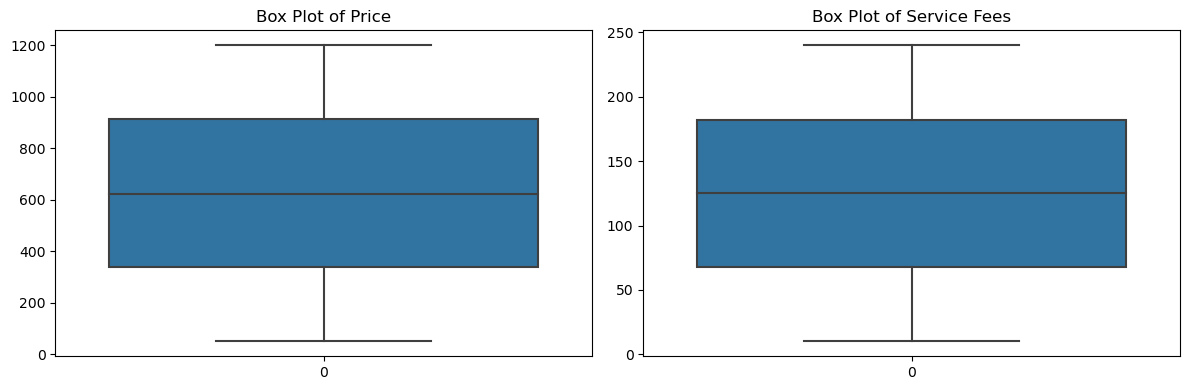

In [20]:
# Create a box plot for both 'price' and 'service fees'
plt.figure(figsize=(12, 4))

# Subplot 1: Box plot for Price
plt.subplot(1, 2, 1)
sns.boxplot(data=df['price'])
plt.title('Box Plot of Price')

# Subplot 2: Box plot for Service Fees
plt.subplot(1, 2, 2)
sns.boxplot(data=df['service_fee'])
plt.title('Box Plot of Service Fees')

# Show the plots
plt.tight_layout()
plt.show()

#### <span style="color:red">There is no outliers so we can fill them using mean </span>

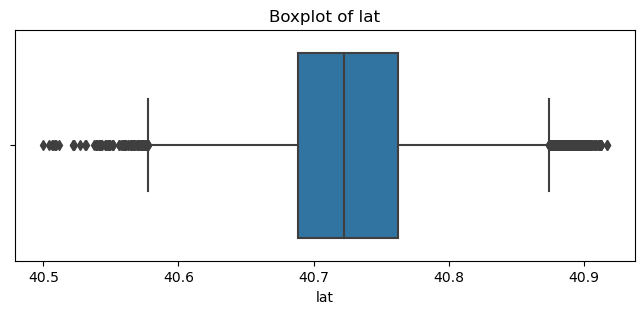

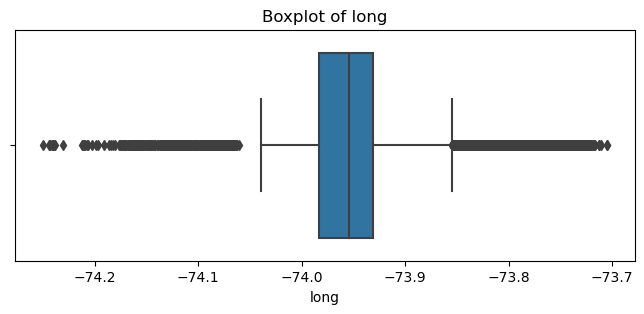

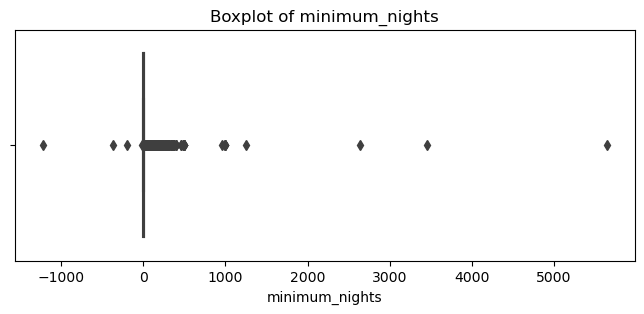

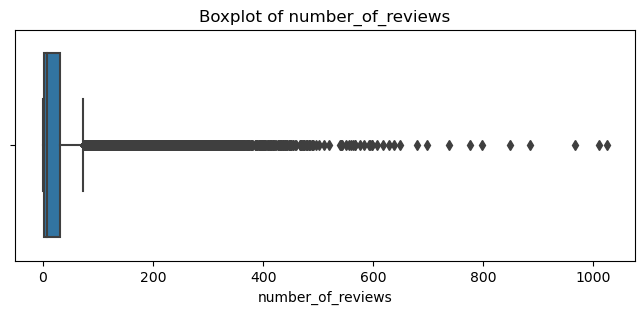

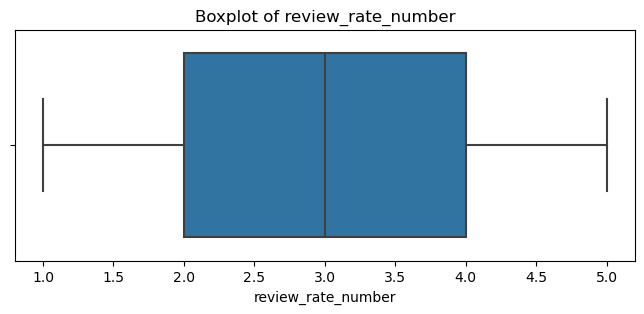

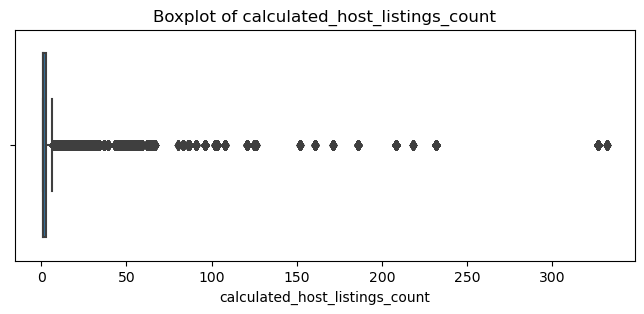

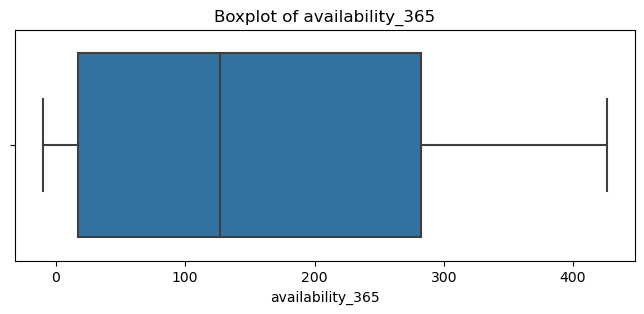

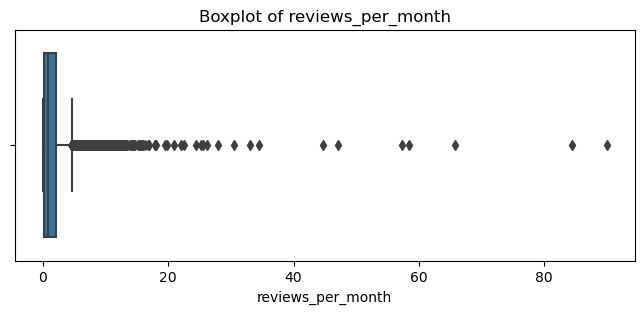

In [21]:
numeric_columns_to_check = ['lat', 'long', 'minimum_nights', 
                            'number_of_reviews', 'review_rate_number', 
                            'calculated_host_listings_count', 'availability_365','reviews_per_month']
for col in numeric_columns_to_check:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [22]:
## let's explore last_review column
df['last_review'].describe()

count                            58477
mean     2019-10-01 15:11:04.692101376
min                2012-07-11 00:00:00
25%                2019-01-03 00:00:00
50%                2019-06-23 00:00:00
75%                2021-09-10 00:00:00
max                2058-06-16 00:00:00
Name: last_review, dtype: object

#### <span style="color:red"> Max date is 2058 which means There is rows above 2024 year let's explore them </span>

In [23]:
df[df['last_review'].apply(lambda x: x.year) > 2024]

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,93725364475,unconfirmed,Aiden,Manhattan,Hell's Kitchen,40.76307,-73.99665,United States,...,108.0,NaN,41.0,2025-06-26,0.38,2.0,1.0,NaN,"You will be sharing a bathroom, so you must be...",NaN
255,1142173,Beautiful Landmarked Duplex,87944779917,NaN,Baker,Brooklyn,Greenpoint,40.72945,-73.95511,United States,...,168.0,3.0,124.0,2058-06-16,1.22,4.0,3.0,230.0,No rules per say. I just ask that you respect ...,NaN
318,1176967,NaN,70084472212,verified,Barnes,Brooklyn,Greenpoint,40.72488,-73.95018,United States,...,184.0,2.0,1.0,2026-03-28,0.01,3.0,1.0,73.0,Check-In is 3pm. Check-Out is 12 Noon. In or...,NaN
483,1268097,Modern Space in Charming Pre-war,13746585241,verified,Adelaide,Manhattan,Harlem,40.82411,-73.94934,United States,...,144.0,2.0,41.0,2040-06-16,0.43,3.0,2.0,47.0,NaN,NaN


#### <span style="color:red"> They are 4 rows so we have outliers here, we will fill NaNs with median </span>

# Handling Missing Values

In [24]:
## first drop columns with large missing values 
## we wil also drop country and country code as our is for US only
df=df.drop(["license",'country','country_code'],axis=1)
df

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102046,57361342,Sunny budget friendly room in Bushwick,29964876857,verified,NaN,Brooklyn,Bushwick,40.69370,-73.91006,True,...,NaN,NaN,5.0,3.0,2018-04-09,0.11,1.0,1.0,0.0,Please be mindful that I live in the same buil...
102047,57361894,"Cozy Apartment on Bedford Ave, Brooklyn",92852058426,unconfirmed,NaN,Brooklyn,Williamsburg,40.71284,-73.96284,False,...,NaN,NaN,7.0,15.0,2018-01-01,0.55,4.0,1.0,0.0,NaN
102048,57362446,Your 1 bedroom home away from home!,95572379802,verified,NaN,Manhattan,Upper West Side,40.79563,-73.97634,True,...,NaN,NaN,3.0,38.0,2019-06-10,1.40,3.0,1.0,31.0,NaN
102049,57362999,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,80154173698,verified,NaN,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,...,NaN,NaN,1.0,81.0,2019-03-05,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...


In [25]:
df.isnull().sum().sort_values(ascending=False)

house_rules                       36645
last_review                       10828
reviews_per_month                 10814
availability_365                    438
minimum_nights                      363
host_name                           313
price                               245
service_fee                         241
review_rate_number                  239
host_identity_verified              217
NAME                                208
Construction_year                   190
number_of_reviews                   152
calculated_host_listings_count      144
instant_bookable                     86
cancellation_policy                  57
neighbourhood_group                  29
neighbourhood                        16
long                                  8
lat                                   8
id                                    0
host_id                               0
room_type                             0
dtype: int64

In [26]:
## fill house_rules with no_rules 
df["house_rules"].fillna("no_rules",inplace=True)

In [27]:
last_review_median=df['last_review'].median()
#last_review_median
df['last_review'].fillna(last_review_median,inplace=True)

In [28]:
df.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10814
availability_365                    438
minimum_nights                      363
host_name                           313
price                               245
service_fee                         241
review_rate_number                  239
host_identity_verified              217
NAME                                208
Construction_year                   190
number_of_reviews                   152
calculated_host_listings_count      144
instant_bookable                     86
cancellation_policy                  57
neighbourhood_group                  29
neighbourhood                        16
long                                  8
lat                                   8
id                                    0
room_type                             0
last_review                           0
host_id                               0
house_rules                           0
dtype: int64

In [29]:
df['reviews_per_month'].min(), df['reviews_per_month'].max()

(0.01, 90.0)

In [30]:
reviews_per_month_median=df['reviews_per_month'].median()
df['reviews_per_month'].fillna(reviews_per_month_median,inplace=True)

In [31]:
df.isnull().sum().sort_values(ascending=False)

availability_365                  438
minimum_nights                    363
host_name                         313
price                             245
service_fee                       241
review_rate_number                239
host_identity_verified            217
NAME                              208
Construction_year                 190
number_of_reviews                 152
calculated_host_listings_count    144
instant_bookable                   86
cancellation_policy                57
neighbourhood_group                29
neighbourhood                      16
long                                8
lat                                 8
id                                  0
room_type                           0
reviews_per_month                   0
last_review                         0
host_id                             0
house_rules                         0
dtype: int64

In [32]:
## fill categorical columns using mode
categorical_columns = ['host_identity_verified','instant_bookable','cancellation_policy','room_type','Construction_year']
for columns in categorical_columns:
    mode_value = df[columns].mode()[0]  # Get the mode value
    df[columns].fillna(mode_value, inplace=True)

In [33]:
df.isnull().sum().sort_values(ascending=False)

availability_365                  438
minimum_nights                    363
host_name                         313
price                             245
service_fee                       241
review_rate_number                239
NAME                              208
number_of_reviews                 152
calculated_host_listings_count    144
neighbourhood_group                29
neighbourhood                      16
lat                                 8
long                                8
id                                  0
reviews_per_month                   0
last_review                         0
room_type                           0
Construction_year                   0
cancellation_policy                 0
instant_bookable                    0
host_identity_verified              0
host_id                             0
house_rules                         0
dtype: int64

In [34]:
numerical_columns=["price","service_fee","review_rate_number","availability_365"]
for columns in numerical_columns:
    mean_value= df[columns].mean()
    df[columns].fillna(mean_value,inplace=True)

In [35]:
df.isnull().sum().sort_values(ascending=False)

minimum_nights                    363
host_name                         313
NAME                              208
number_of_reviews                 152
calculated_host_listings_count    144
neighbourhood_group                29
neighbourhood                      16
lat                                 8
long                                8
id                                  0
availability_365                    0
review_rate_number                  0
reviews_per_month                   0
last_review                         0
room_type                           0
service_fee                         0
price                               0
Construction_year                   0
cancellation_policy                 0
instant_bookable                    0
host_identity_verified              0
host_id                             0
house_rules                         0
dtype: int64

In [36]:
# Display rows where 'minimum_nights' has negative values
negative_min_nights = df[df['minimum_nights'] < 0]
print(negative_min_nights)

             id                                               NAME  \
176     1098541                BROOKLYN VICTORIAN STYLE SUITE.....   
352     1195746     Beautiful, Bright’s, Warm & Spacious 1.5BR Apt   
398     1221151                 SUPER BIG AND COZY PRIVATE BEDROOM   
421     1233854                        Charming Nolita Apartment!!   
441     1244900                     Cozy apartment in a brownstone   
478     1265335                 Charming upper west side apartment   
525     1291294  Chateau Style Brooklyn Loft for Singles or Cou...   
42446  24444262            Cozy room in bright, spacious apartment   
42500  24474086  2bd BOUTIQUE  Apartament in the heart of MANHA...   
42538  24495073                   Newly Renovated Garden Apartment   

           host_id host_identity_verified  host_name neighbourhood_group  \
176    83631499592            unconfirmed  Frederick            Brooklyn   
352     2227683633            unconfirmed      Grant            Brooklyn   
3

In [37]:
# Calculate the median of 'minimum_nights'
median_value = df['minimum_nights'].median()

# Replace negative values with the median
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: median_value if x < 0 else x)

# replace NaNs also with median values 
df['minimum_nights'].fillna(median_value,inplace=True)

In [38]:
df.isnull().sum().sort_values(ascending=False)

host_name                         313
NAME                              208
number_of_reviews                 152
calculated_host_listings_count    144
neighbourhood_group                29
neighbourhood                      16
lat                                 8
long                                8
id                                  0
minimum_nights                      0
availability_365                    0
review_rate_number                  0
reviews_per_month                   0
last_review                         0
room_type                           0
service_fee                         0
price                               0
Construction_year                   0
cancellation_policy                 0
instant_bookable                    0
host_identity_verified              0
host_id                             0
house_rules                         0
dtype: int64

In [39]:
df['host_name'].fillna('unknown', inplace=True)
df['NAME'].fillna('unknown', inplace=True)

df['number_of_reviews'].fillna(df['number_of_reviews'].median(), inplace=True)
df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].median(), inplace=True)

#Fill 'lat' and 'long' columns with 0 as 'unknown'
df['lat'].fillna(0, inplace=True)
df['long'].fillna(0, inplace=True)

In [40]:
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               29
neighbourhood                     16
id                                 0
price                              0
availability_365                   0
calculated_host_listings_count     0
review_rate_number                 0
reviews_per_month                  0
last_review                        0
number_of_reviews                  0
minimum_nights                     0
service_fee                        0
room_type                          0
Construction_year                  0
NAME                               0
cancellation_policy                0
instant_bookable                   0
long                               0
lat                                0
host_name                          0
host_identity_verified             0
host_id                            0
house_rules                        0
dtype: int64

In [41]:
# Check for rows where either 'neighbourhood_group' or 'neighbourhood' is missing
missing_pattern = df[df['neighbourhood_group'].isna() | df['neighbourhood'].isna()]
print(missing_pattern[['neighbourhood_group', 'neighbourhood']])

      neighbourhood_group       neighbourhood
74                    NaN  Washington Heights
75                    NaN        Clinton Hill
76                    NaN        East Village
77                    NaN     Upper East Side
78                    NaN            Woodside
90                    NaN        Williamsburg
91                    NaN            Bushwick
92                    NaN    Prospect Heights
148                   NaN        East Village
161                   NaN        Williamsburg
168                   NaN        Clinton Hill
196                   NaN             Chelsea
206                   NaN    Prospect Heights
241                   NaN         East Harlem
249                   NaN            Bushwick
262                   NaN         Eastchester
287                   NaN        Williamsburg
295                   NaN              Harlem
307                   NaN           Chinatown
319                   NaN        Williamsburg
361                   NaN      Que

In [42]:
pd.crosstab(df['neighbourhood_group'], df['neighbourhood'])

neighbourhood,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
neighbourhood_group,,,,,,,,,,,,,,,,,,,,,
Bronx,73,0,0,0,0,0,0,0,0,0,...,0,0,76,0,0,0,0,17,0,0
Brooklyn,0,0,0,0,0,33,0,214,0,0,...,0,0,0,5074,0,217,0,0,0,0
Manhattan,0,0,0,0,0,0,84,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Queens,0,0,0,154,1272,0,0,0,8,0,...,0,18,0,0,0,0,141,0,0,447
Staten Island,0,6,31,0,0,0,0,0,0,2,...,3,0,0,0,2,0,0,0,2,0


In [43]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['neighbourhood_group'], df['neighbourhood'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print("p-value:", p)

# A low p-value (e.g., < 0.05) indicates that the variables are dependent
if p < 0.05:
    print("The variables are likely related.")
else:
    print("The variables are likely independent.")

p-value: 0.0
The variables are likely related.


In [44]:
# Step 1: Create a mapping from neighbourhood to neighbourhood_group
neighbourhood_group_map = df.dropna(subset=['neighbourhood_group']).set_index('neighbourhood')['neighbourhood_group'].to_dict()
#neighbourhood_group_map
# Step 2: Fill missing neighbourhood_group based on the neighbourhood value
df['neighbourhood_group'] = df.apply(lambda row: neighbourhood_group_map.get(row['neighbourhood'], row['neighbourhood_group']), axis=1)

# Step 3: Fill missing neighbourhood based on the most common neighbourhood in each neighbourhood_group using transform to ensure index alignment
df['neighbourhood'] = df['neighbourhood'].fillna(df.groupby('neighbourhood_group')['neighbourhood'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

# Check for any remaining NaN values in these columns
print(df[['neighbourhood_group', 'neighbourhood']].isna().sum())

neighbourhood_group    0
neighbourhood          0
dtype: int64


In [45]:
df.isnull().sum()

id                                0
NAME                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
Construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

#  <span style="color:blue"> 4- Data Visualization :</span>

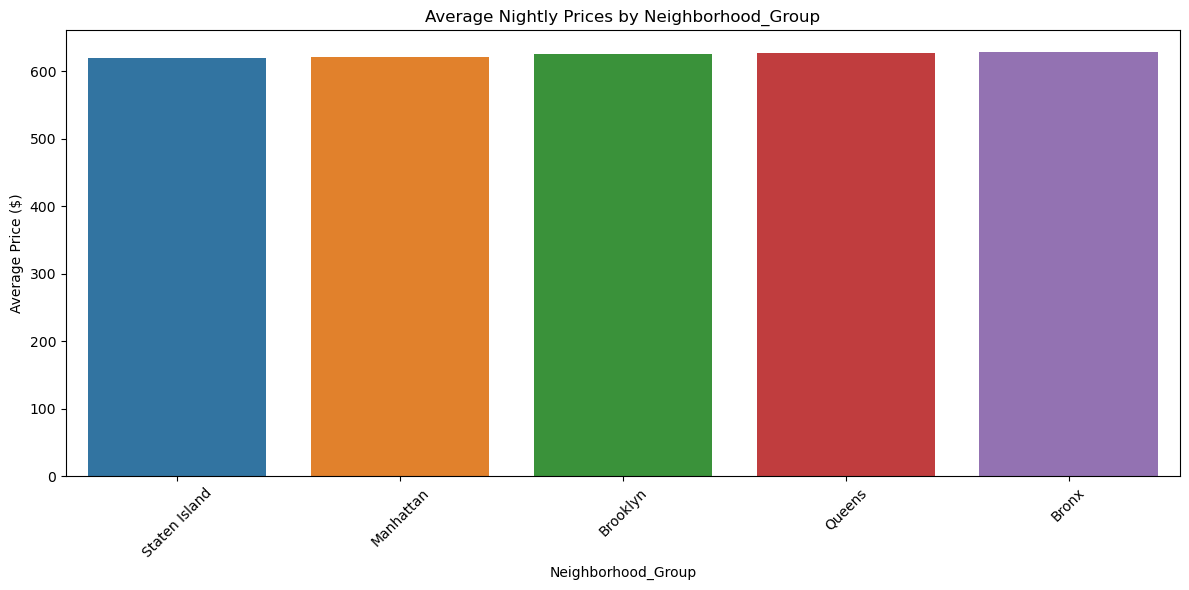

In [57]:
# Average price by neighborhood group
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45)
plt.title('Average Nightly Prices by Neighborhood_Group')
plt.xlabel('Neighborhood_Group')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

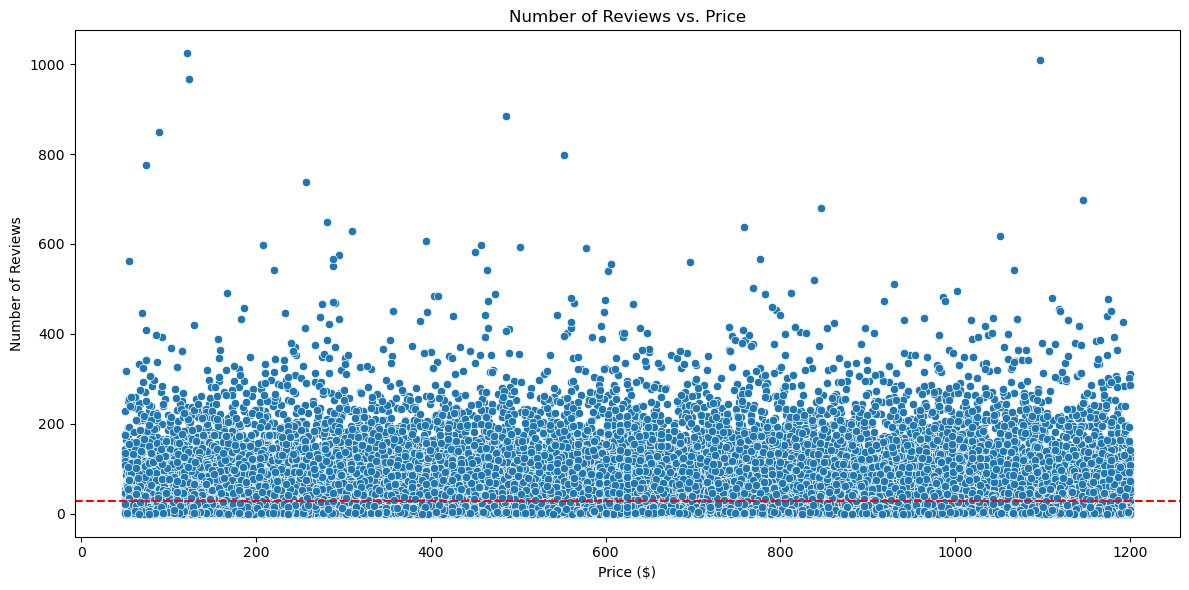

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='number_of_reviews')
plt.title('Number of Reviews vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.axhline(y=df['number_of_reviews'].mean(), color='r', linestyle='--')
plt.tight_layout()
plt.show()

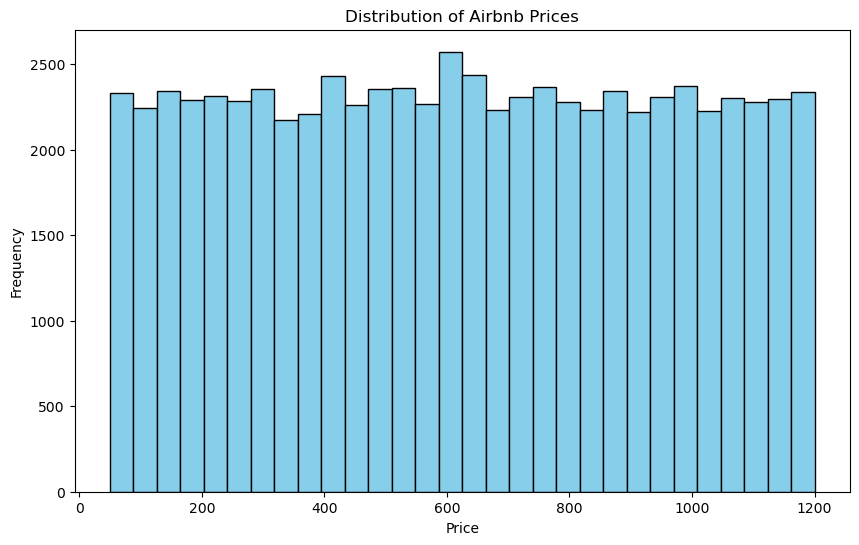

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

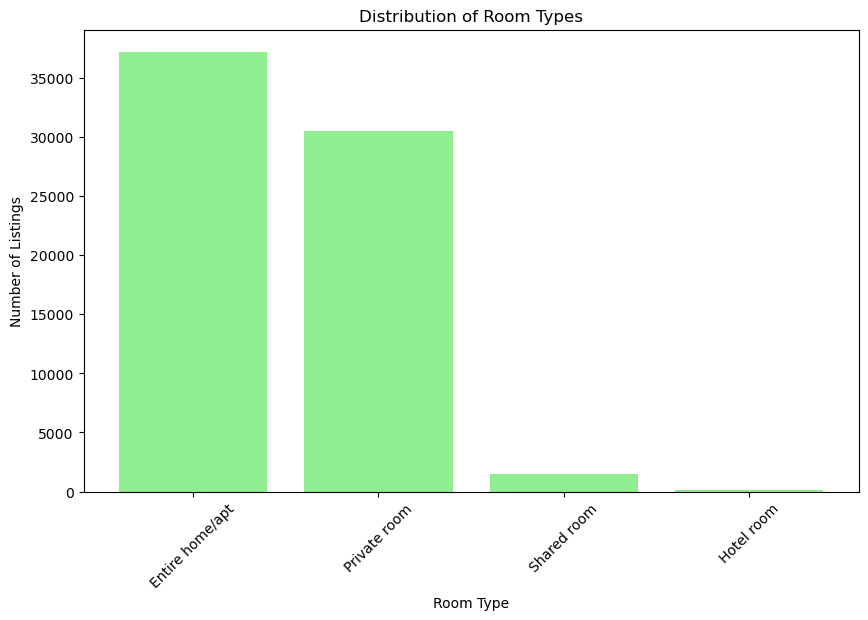

In [49]:
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color='lightgreen')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

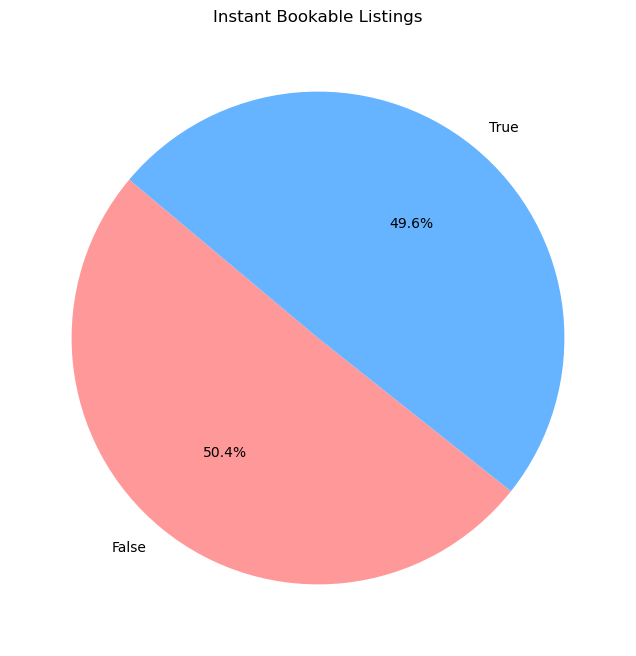

In [50]:
instant_bookable_counts = df['instant_bookable'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(instant_bookable_counts, labels=instant_bookable_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Instant Bookable Listings')
plt.show()

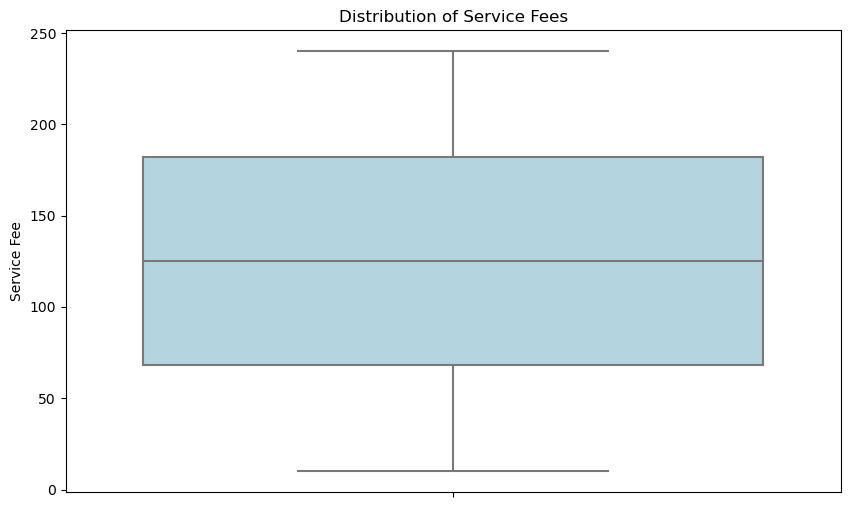

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['service_fee'], color='lightblue')
plt.title('Distribution of Service Fees')
plt.ylabel('Service Fee')
plt.show()

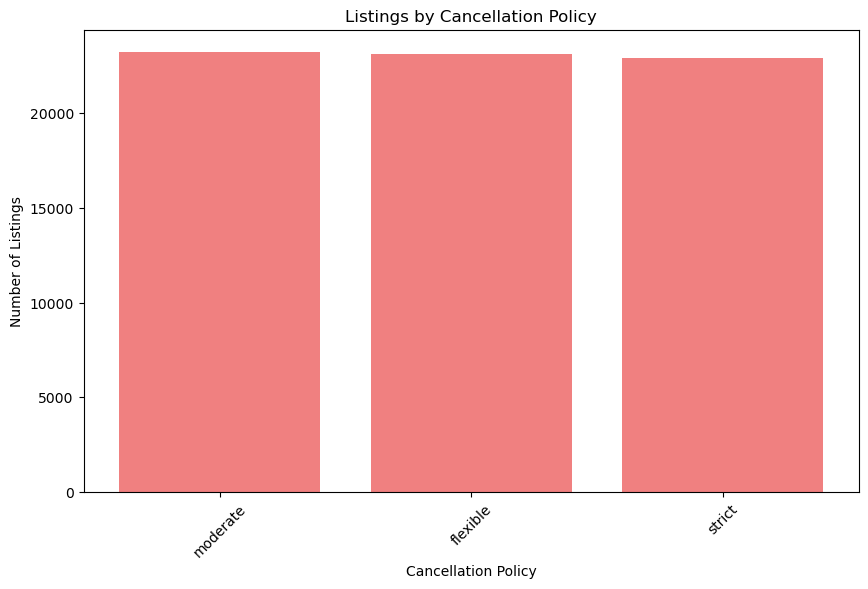

In [52]:
cancellation_policy_counts = df['cancellation_policy'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(cancellation_policy_counts.index, cancellation_policy_counts.values, color='lightcoral')
plt.title('Listings by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

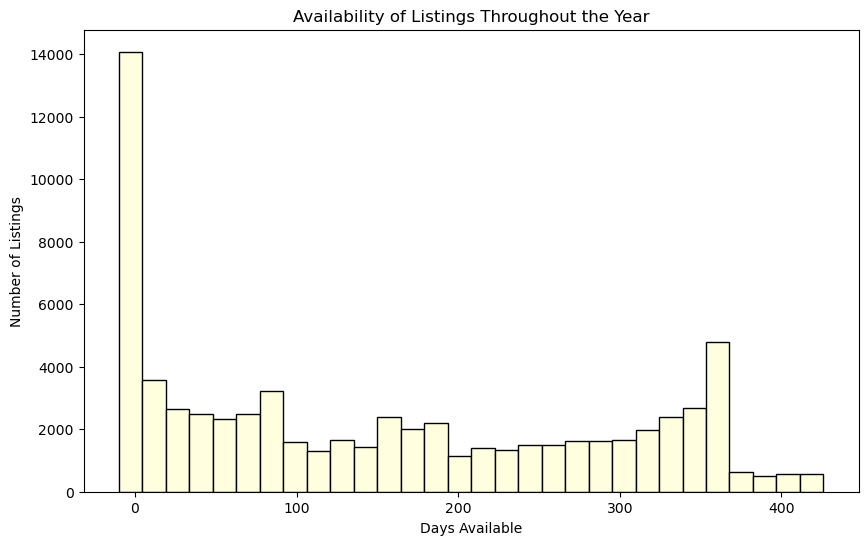

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30, color='lightyellow', edgecolor='black')
plt.title('Availability of Listings Throughout the Year')
plt.xlabel('Days Available')
plt.ylabel('Number of Listings')
plt.show()

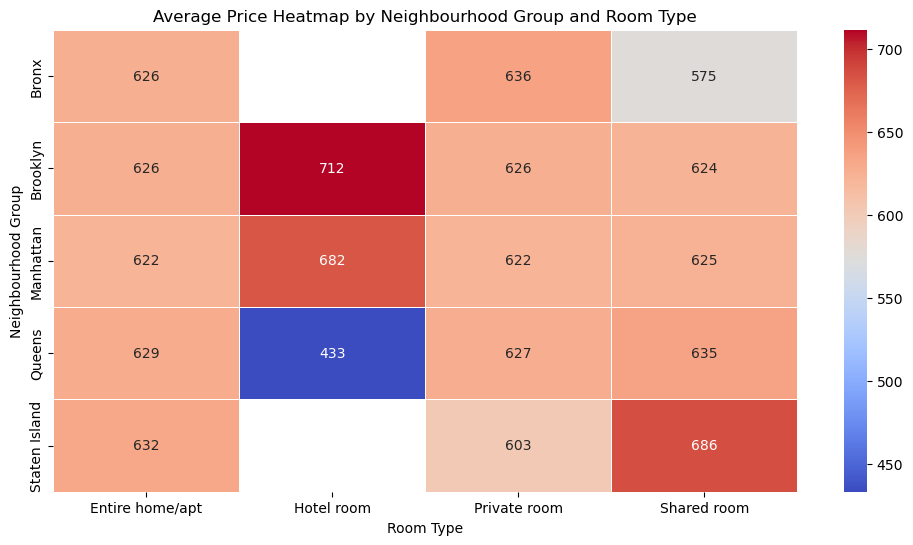

In [54]:
pivot_table = df.pivot_table(values='price', index='neighbourhood_group', columns='room_type', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Average Price Heatmap by Neighbourhood Group and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bedford-Stuyvesant'),
  Text(1, 0, 'Williamsburg'),
  Text(2, 0, 'Harlem'),
  Text(3, 0, 'Bushwick'),
  Text(4, 0, "Hell's Kitchen"),
  Text(5, 0, 'Upper West Side'),
  Text(6, 0, 'Upper East Side'),
  Text(7, 0, 'Midtown'),
  Text(8, 0, 'East Village'),
  Text(9, 0, 'Crown Heights')])

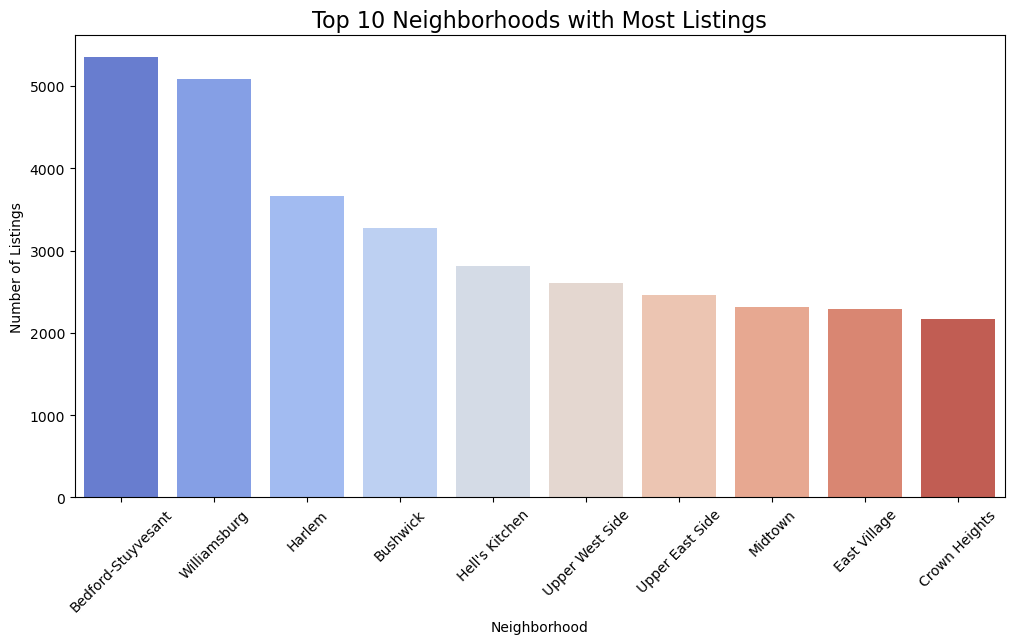

In [55]:
plt.figure(figsize=(12, 6))
neighborhood_host_counts = df['neighbourhood'].value_counts().head(10)
sns.barplot(x=neighborhood_host_counts.index, y=neighborhood_host_counts.values, palette='coolwarm')
plt.title("Top 10 Neighborhoods with Most Listings", fontsize=16)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)